In [1]:
import numpy as np
import open3d as o3d
import matplotlib.pyplot as plt
from tqdm import tqdm

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
dataset = o3d.data.BunnyMesh()
mesh = o3d.io.read_triangle_mesh(dataset.path)

In [120]:
mesh_path = 'ImageToStl.com_pikachu.obj'
mesh_path = 'botGERMAN1953.obj'
mesh = o3d.io.read_triangle_mesh(mesh_path,True)

[Open3D INFO] Skipping non-triangle primitive geometry of type: 20


In [3]:
mesh

TriangleMesh with 35947 points and 69451 triangles.

In [4]:
print(mesh)
print('Vertices:')
print(np.asarray(mesh.vertices))
print('Triangles:')
print(np.asarray(mesh.triangles))

TriangleMesh with 35947 points and 69451 triangles.
Vertices:
[[-0.0378297   0.12794     0.00447467]
 [-0.0447794   0.128887    0.00190497]
 [-0.0680095   0.151244    0.0371953 ]
 ...
 [-0.0704544   0.150585   -0.0434585 ]
 [-0.0310262   0.153728   -0.00354608]
 [-0.0400442   0.15362    -0.00816685]]
Triangles:
[[21216 21215 20399]
 [ 9186  9280 14838]
 [16020 13433  5187]
 ...
 [17346 34909 17279]
 [34909 17346 17277]
 [17277 17346 17345]]


In [58]:
vertices = np.asarray(mesh.vertices)
triangles = np.asarray(mesh.triangles)

In [126]:
vertices.shape

(35947, 3)

In [161]:
triangles.shape

(69451, 3)

In [162]:
np.arange(35947)

array([    0,     1,     2, ..., 35944, 35945, 35946])

In [163]:
np.setxor1d(np.unique(triangles.reshape(-1)), np.arange(35947))

array([    8,    16,    18, ..., 35917, 35919, 35930])

In [128]:
vertices.shape[0] / triangles.shape[0]

0.5175879396984925

In [6]:
def equation_plane(v0, v1, v2):
    x1, y1, z1 = v0
    x2, y2, z2 = v1 
    x3, y3, z3 = v2
    
    a1 = x2 - x1
    b1 = y2 - y1
    c1 = z2 - z1
    a2 = x3 - x1
    b2 = y3 - y1
    c2 = z3 - z1
    
    a = b1 * c2 - b2 * c1
    b = a2 * c1 - a1 * c2
    c = a1 * b2 - b1 * a2
    d = (- a * x1 - b * y1 - c * z1)
    
    p = np.array([a, b, c, d])
    
    return p

In [12]:
t0 = triangles[0]

In [14]:
t0

array([0, 1, 2], dtype=int32)

In [21]:
v0, v1, v2 = vertices[t0[0]], vertices[t0[1]], vertices[t0[2]]

In [22]:
v0, v1, v2

(array([4.60764885, 2.05739808, 6.78165483]),
 array([-4.89530897,  7.51562309,  6.78165627]),
 array([-4.89530802,  2.05739498,  6.78165722]))

In [35]:
p = equation_plane(v0, v1, v2)
a, b, c, d = p
p

array([ 1.30134270e-05,  9.06272817e-06,  5.18693063e+01, -3.51759811e+02])

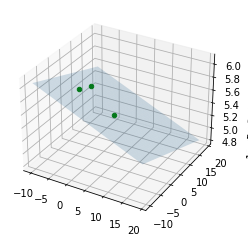

In [36]:
xx, yy = np.meshgrid(range(-10, 20), range(-10, 20))
z = (-a * xx - b * yy - d) * 1. / c

# plot the surface
# Create the figure
fig = plt.figure()

# Add an axes
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx, yy, z, alpha=0.2)

# Ensure that the next plot doesn't overwrite the first plot
ax = plt.gca()
# ax.hold(True)

ax.scatter(v0[0], v0[1], v0[2], color='green')
ax.scatter(v1[0], v1[1], v1[2], color='green')
ax.scatter(v2[0], v2[1], v2[2], color='green')

In [46]:
np.outer(p, p)

array([[ 1.69349281e-10,  1.17937151e-10,  6.74997429e-04,
        -4.57760060e-03],
       [ 1.17937151e-10,  8.21330418e-11,  4.70077423e-04,
        -3.18790354e-03],
       [ 6.74997429e-04,  4.70077423e-04,  2.69042494e+03,
        -1.82455374e+04],
       [-4.57760060e-03, -3.18790354e-03, -1.82455374e+04,
         1.23734964e+05]])

In [7]:
# calculate K
def calculate_K(vertices, triangles):
    K_list = []

    for i in range(len(triangles)):
        t = triangles[i]
        v0, v1, v2 = vertices[t[0]], vertices[t[1]], vertices[t[2]]
        p = equation_plane(v0, v1, v2)
        K = np.outer(p, p)
        K_list.append(K)
                
    return K_list

In [8]:
# create dict {v_id: [t_id0, t_id1, ...]}
def create_v_tr(triangles):
    v_tr = {}

    for i in range(len(triangles)):
        t = triangles[i]
        for v in t:
            if v in v_tr:
                v_tr[v].append(i)
            else:
                v_tr[v] = [i]
                
    return v_tr

In [9]:
K_list = calculate_K(vertices, triangles)
v_tr = create_v_tr(triangles)

In [136]:
c1, c2, c3, c4, c5, c6, cm = 0, 0, 0, 0, 0, 0, 0

for el in v_tr.values():
    if len(el) == 1:
        c1 += 1
    elif len(el) == 2:
        c2 += 1
    elif len(el) == 3:
        c3 += 1
    elif len(el) == 4:
        c4 += 1
    elif len(el) == 5:
        c5 += 1
    elif len(el) == 6:
        c6 += 1
    else:
        cm += 1

In [138]:
c1, c2, c3, c4, c5, c6, cm

(2, 31, 111, 438, 3875, 26165, 4212)

In [10]:
def calculate_Q(K_list, v_tr):
    v_Q = {}

    for v_id, tr_ids in v_tr.items():
        Q = sum([K_list[el] for el in tr_ids])
        v_Q[v_id] = Q
        
    return v_Q

In [11]:
v_Q = calculate_Q(K_list, v_tr)

In [142]:
len(v_Q)

34834

In [78]:
b = np.ones((vertices.shape[0], 1))
vertices_4d = np.hstack((vertices, b))

In [79]:
vertices_4d

array([[ 4.60764885,  2.05739808,  6.78165483,  1.        ],
       [-4.89530897,  7.51562309,  6.78165627,  1.        ],
       [-4.89530802,  2.05739498,  6.78165722,  1.        ],
       ...,
       [-0.171202  ,  0.61816502,  0.73623413,  1.        ],
       [-0.081321  ,  0.62343591,  0.72724301,  1.        ],
       [-0.06898499,  0.62579101,  0.72813702,  1.        ]])

In [80]:
v0 = vertices_4d[0]

In [96]:
v0 = np.reshape(v0, (-1, 4))
v0.shape

(1, 4)

In [97]:
v_Q[0].shape

(4, 4)

In [100]:
np.dot(np.dot(v0, v_Q[0]), v0.T)[0][0]

1.7845083751190768e-18

In [147]:
len(set(v_tr[0]).intersection(set(v_tr[1])))

0

In [168]:
len(set([1, 2, 3]).intersection(set([2, 4])))

1

In [172]:
np.linalg.norm([1, 2, 3])

3.7416573867739413

In [192]:
np.where(np.sum((vertices[0:3] - vertices[0]) ** 2, axis=1) ** 0.5 < 0.05)[0]

array([0, 1], dtype=int64)

In [203]:
np.vstack((
    np.vstack((np.ones(5) * 3, np.array([0, 3, 4, 5, 8]))).T,
    np.vstack((np.ones(5) * 3, np.array([0, 3, 4, 5, 8]))).T
))

array([[3., 0.],
       [3., 3.],
       [3., 4.],
       [3., 5.],
       [3., 8.],
       [3., 0.],
       [3., 3.],
       [3., 4.],
       [3., 5.],
       [3., 8.]])

In [12]:
def select_valid_pairs(vertices, v_tr, t=0.001):
    
    valid_pairs = np.array([])
    
    for i in tqdm(range(len(vertices))):
        v = vertices[i]
        distances = np.sum((vertices - v) ** 2, axis=1) ** 0.5
        valid = np.where(distances < t)[0]
        pairs = np.vstack((np.ones(len(valid)) * i, valid)).T
        
        if i == 0:
            valid_pairs = pairs
        else:
            valid_pairs = np.vstack((valid_pairs, pairs))

    valid_pairs = valid_pairs[valid_pairs[:, 0] != valid_pairs[:, 1]]
    valid_pairs = valid_pairs.astype(int)
    
    return valid_pairs

In [13]:
valid_pairs = select_valid_pairs(vertices, v_tr)

100%|██████████| 35947/35947 [00:22<00:00, 1631.77it/s]


In [351]:
valid_pairs.shape

(12704, 2)

In [14]:
def calculate_error(valid_pairs, v_Q, vertices):
    errors = []
    
    b = np.ones((vertices.shape[0], 1))
    vertices_4d = np.hstack((vertices, b))

    for i in range(len(valid_pairs)):
        pair = valid_pairs[i]
        v = (vertices_4d[pair[0]] - vertices_4d[pair[1]]) / 2
        
        try:
            Q1 = v_Q[pair[0]]
            Q2 = v_Q[pair[1]]
            Q = Q1 + Q2
        
            error = np.dot(np.dot(v, Q), v.T)    
        except KeyError:
            error = 10 ** 10
        
        errors.append(error)
        
    return errors

In [15]:
errors = calculate_error(valid_pairs, v_Q, vertices)

In [16]:
queue = np.hstack((valid_pairs, np.reshape(errors, (-1, 1))))

In [23]:
outliers = np.unique(queue[queue[:, 2] == 10**10][:, 0:2]).astype(int)

In [24]:
queue = queue[queue[:, 2] != 10 ** 10]

In [25]:
queue = queue[np.argsort(queue[:, 2])]

In [395]:
queue.shape

(9258, 3)

In [397]:
queue

array([[3.47740000e+04, 3.47730000e+04, 5.40868565e-26],
       [3.47730000e+04, 3.47740000e+04, 5.40868565e-26],
       [1.72170000e+04, 1.72180000e+04, 1.68450047e-23],
       ...,
       [3.00280000e+04, 3.00290000e+04, 6.58712719e-18],
       [3.23580000e+04, 3.23570000e+04, 7.05953622e-18],
       [3.23570000e+04, 3.23580000e+04, 7.05953622e-18]])

In [36]:
def remove_vertices(queue, vertices, triangles, v_tr):
    v1_deleted = []
    
    # to remove vertice
    for q in queue:
        v0, v1, error = q
        v0, v1 = int(v0), int(v1)

        if v0 not in v1_deleted or v1 not in v1_deleted:
            # 1. update v1 values in vertices
            vertices[v0] = (vertices[v0] + vertices[v1]) / 2

            # 2. change v2 to v1 in planes
            for tr in v_tr[v1]:
                triangles[tr][triangles[tr] == v1] = v0

            # 3. update cost for v1/v2
            pass

            # 4. remove v2 from cost
            v1_deleted.append(v1)

            # 5. remove v2 from vertices
            pass
    
    return vertices, triangles

In [41]:
vertices_new, triangles_new = remove_vertices(queue, vertices, triangles, v_tr)

In [39]:
queue

array([[3.47740000e+04, 3.47730000e+04, 2.16347426e-25],
       [3.47730000e+04, 3.47740000e+04, 2.16347426e-25],
       [1.72170000e+04, 1.72180000e+04, 1.68450047e-23],
       ...,
       [3.00280000e+04, 3.00290000e+04, 6.58712719e-18],
       [3.23580000e+04, 3.23570000e+04, 7.05953622e-18],
       [3.23570000e+04, 3.23580000e+04, 7.05953622e-18]])

In [60]:
triangles[triangles[:, 1] == 34773]

array([[34775, 34773, 34645]], dtype=int32)

In [57]:
for tr in v_tr[34773]:
    print(triangles[tr])

[34646 34774 34772]
[34774 34902 34901]
[34772 34774 34901]
[34645 34774 34774]
[34646 34646 34774]
[34774 34774 34902]


In [51]:
for tr in v_tr[34773]:
    triangles[tr][triangles[tr] == 34773] = 34774

In [42]:
triangles_new[triangles_new[:, 1] == 34773]

array([[34645, 34773, 34773],
       [34773, 34773, 34902],
       [34775, 34773, 34645]], dtype=int32)

In [427]:
triangles_new[65962]

array([34774, 34774, 34902], dtype=int32)

In [358]:
v0, v1

(34774, 34773)

In [362]:
v1

34773

In [360]:
v_tr[v1]

[65822, 65824, 65825, 65959, 65960, 65962]

In [363]:
triangles[65822]

array([34645, 34773, 34772], dtype=int32)

In [368]:
triangles[65822][triangles[65822] == v1] = v0

In [369]:
triangles[65822]

array([34645, 34774, 34772], dtype=int32)

In [379]:
queue[(queue[:, 0] != v1) & (queue[:, 1] != v1)].shape

(12702, 3)

In [375]:
queue.shape

(12704, 3)

In [404]:
vertices_new.shape, vertices.shape

((35947, 3), (35947, 3))

In [406]:
triangles_new.shape, triangles.shape

((69451, 3), (69451, 3))

In [410]:
len(np.unique(triangles_new))

34630

In [411]:
len(np.unique(triangles))

34630